In [11]:
import code

import matplotlib as mpl
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [12]:
from code import *

In [ ]:
plo

In [13]:
this = Simulation(data_source = 'adk_md_data')
# Directory hack before I modularize simulation.py with __init__.py (see #10)
this.dir = '../../md-data/adenylate-kinase/'
this.name = 'chi2THR175'
this.simulate()

Cannot read chi2THR175 from ../md-data/adenylate-kinase.


ZeroDivisionError: float division by zero

In [11]:
this.dir

'../md-data/adenylate-kinase'

In [8]:
!ls ../

aesthetics.py						plot.py
analysis.py						__pycache__
csv							render-dihedrals
dat							simulation.py
data.py							summarize.py
extrapolate-hiv-protease-flux-to-low-catalytic-rate.py	tests.py
figures.py						thresholding.py
force-on-barrier					uncategorized-notebooks
models.py						velocity.py
pickles


In [ ]:
plot_flux(this)

In [23]:
this.tm[0]

array([  8.26722926e-01,   7.69134900e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [24]:
blocked = Simulation(data_source = 'adk_md_data')
blocked.name = 'chi2THR175'
blocked.barrier = True
blocked.barrier_bin = 0
blocked.simulate()

In [25]:
blocked.tm[0]

array([  9.03636416e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -4.04e-04  cycle second**-1
Peak                      +1.48e+00  cycle second**-1


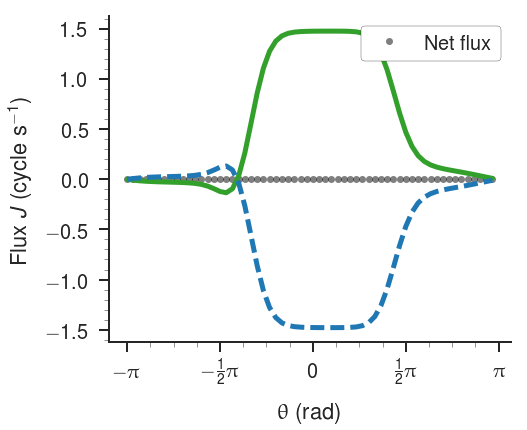

In [26]:
plot_flux(blocked)

Does adding a barrier increase the reciprocating probability flux? Hmm.

In [32]:
this.ss[-1]

2.209972507186874e-06

In [27]:
this.ss[0]

0.0049021119454631407

In [33]:
this.ss[1]

0.0041759063917883067

In [34]:
blocked.ss[-1]

2.210097647275377e-06

In [30]:
blocked.ss[0]

0.0049021092125269127

In [31]:
blocked.ss[1]

0.0041759092631112353

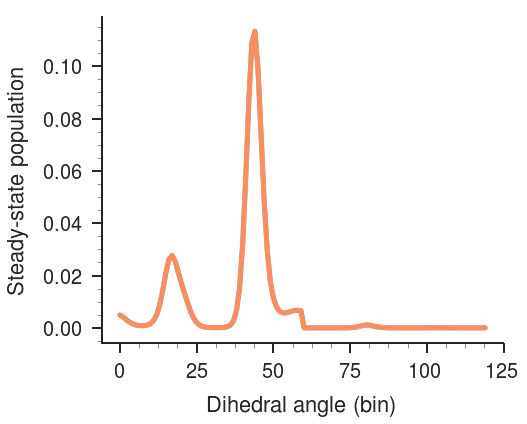

In [45]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])
c = sns.color_palette("Set2", n_colors=8)

ax1.plot(this.ss, color=c[0])
ax1.plot(blocked.ss, color=c[1])

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population')
paper_plot(fig)

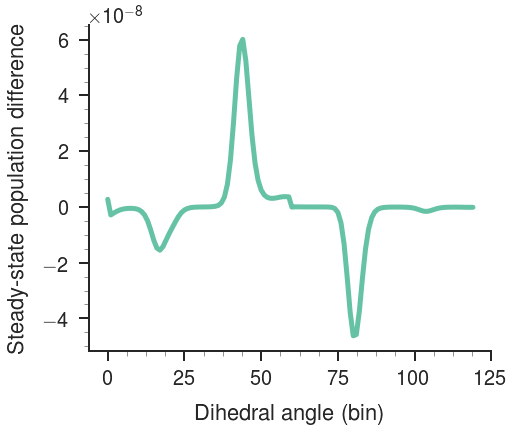

In [46]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])
c = sns.color_palette("Set2", n_colors=8)

ax1.plot(this.ss - blocked.ss, color=c[0])

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population difference')
paper_plot(fig)

In [39]:
this.ss - blocked.ss

array([  2.73293623e-09,  -2.87132293e-09,  -2.17468717e-09,
        -1.54898192e-09,  -1.07202902e-09,  -7.58180013e-10,
        -5.82395978e-10,  -5.09386241e-10,  -5.19826659e-10,
        -6.32403005e-10,  -9.41193440e-10,  -1.61361846e-09,
        -2.87110061e-09,  -5.03710284e-09,  -8.26105720e-09,
        -1.19431288e-08,  -1.47460219e-08,  -1.55296155e-08,
        -1.42489285e-08,  -1.19281753e-08,  -9.60324816e-09,
        -7.50650615e-09,  -5.44477792e-09,  -3.52373746e-09,
        -2.04720171e-09,  -1.09589394e-09,  -5.47517252e-10,
        -2.59818203e-10,  -1.21189507e-10,  -5.56407548e-11,
        -2.37393662e-11,  -5.06723892e-12,   1.02768998e-11,
         3.26024677e-11,   8.62073502e-11,   2.13358601e-10,
         5.37842298e-10,   1.39016331e-09,   3.49977949e-09,
         8.18023571e-09,   1.70184349e-08,   3.05525198e-08,
         4.61650685e-08,   5.78512253e-08,   6.01573134e-08,
         5.24342841e-08,   3.90932577e-08,   2.57416594e-08,
         1.57164921e-08,

In [48]:
this.tm[0] - blocked.tm[0]

array([-0.07691349,  0.07691349,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  